In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/05-Fill_Betweens/data.csv'
df = pd.read_csv(url)
df.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


In [9]:
plt.style.use('fivethirtyeight')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

<AxesSubplot: title={'center': 'Median Salary (USD) by age'}, xlabel='Age', ylabel='Median Salary (USD)'>

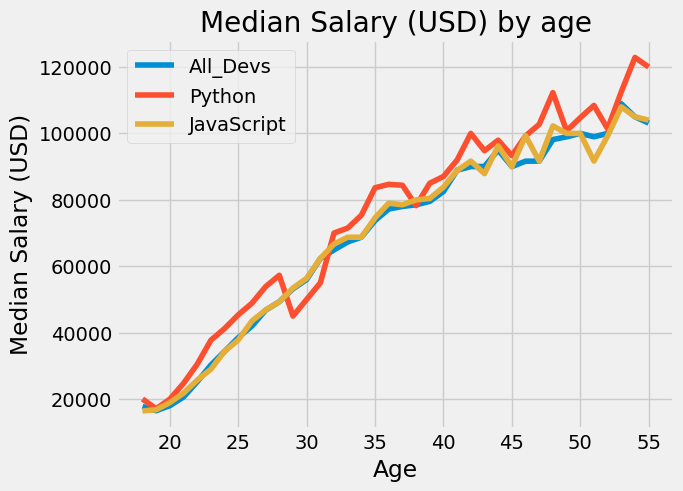

In [18]:
df.plot(x='Age', title='Median Salary (USD) by age', ylabel='Median Salary (USD)')

/tmp/ipykernel_25857/3883977943.py:18: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_median = pd.melt(df, value_vars=['All_Devs', 'Python', 'JavaScript']).median()['value']


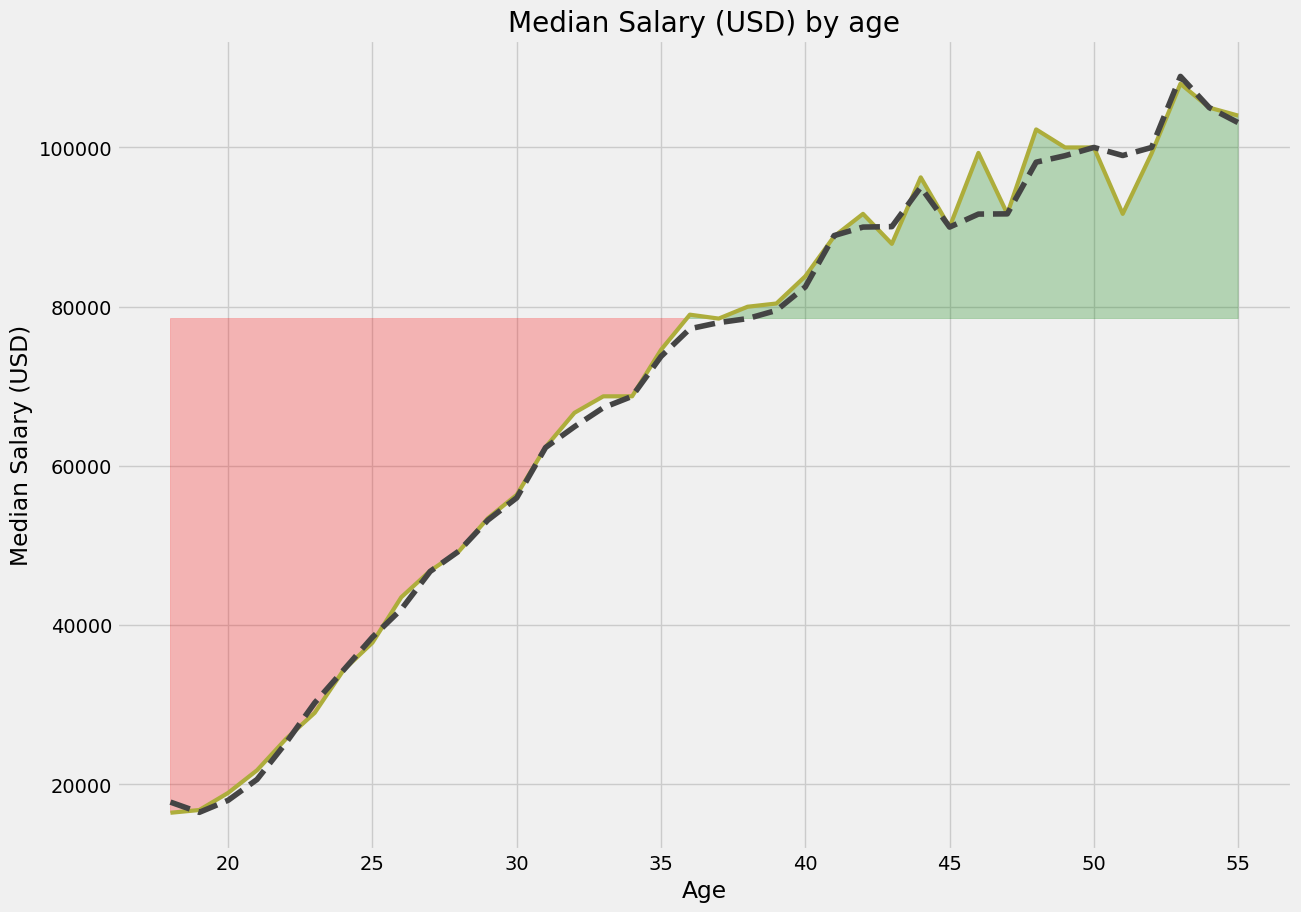

In [91]:
# with separate df columns
ages_x = df['Age']
py_dev_y = df['Python']
js_dev_y = df['JavaScript']
dev_y = df['All_Devs']

# plt.plot(ages_x, py_dev_y, color='#5a7d9a', linewidth=3, label='Python')

plt.plot(ages_x, js_dev_y, color='#adad3b', linewidth=3, label='JS')

plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

plt.title('Median Salary (USD) by age')
plt.ylabel('Median Salary (USD)')
plt.xlabel('Age')

# stacks 'All_Devs', 'Python', 'JavaScript' columns into one, finds median on it and saves value
total_median = pd.melt(df, value_vars=['All_Devs', 'Python', 'JavaScript']).median()['value']

# plt.fill_between(x=ages_x, y1=js_dev_y, alpha=0.25).get_figure().set_size_inches(13.5, 10)
#===============================================================

# shows where salary crossed total median boundary with 1 color
# plt.fill_between(x=ages_x, 
#                  y1=js_dev_y,
#                  y2=total_median,
#                  alpha=0.25).get_figure().set_size_inches(13.5, 10)
#===============================================================


# shows where salary crossed total median boundary with 2 colors
plt.fill_between(x=ages_x, 
                 y1=js_dev_y, 
                 y2=total_median,
                 where=(js_dev_y > total_median),
                 color='green',
                 interpolate=True,
                 alpha=0.25,
                 label='JS Above Avg')
plt.fill_between(x=ages_x, 
                 y1=js_dev_y, 
                 y2=total_median,
                 where=(js_dev_y <= total_median),
                 color='red',
                 interpolate=True,
                 alpha=0.25,
                 label='JS Below Avg').get_figure().set_size_inches(13.5, 10)
#===============================================================


# # shows where dev salary and js salary cross each other
# plt.fill_between(x=ages_x,
#                 y1=js_dev_y,
#                 y2=dev_y,
#                 where=(js_dev_y > dev_y),
#                 interpolate=True,
#                 color='green',
#                 alpha=0.25,
#                 label='JS above Dev')
# plt.fill_between(x=ages_x,
#                 y1=js_dev_y,
#                 y2=dev_y,
#                 where=(js_dev_y <= dev_y),
#                 interpolate=True,
#                 color='red',
#                 alpha=0.25,
#                 label='JS below Dev').get_figure().set_size_inches(13.5, 10)
#===============================================================

# plt.legend()